#### Αριστοτέλειο Πανεπιστήµιο Θεσσαλονίκης
#### Πολυτεχνική Σχολή
##### Τµήµα Ηλεκτρολόγων Μηχανικών και Μηχανικών Υπολογιστών   
##### Τοµέας Ηλεκτρονικής και Υπολογιστών

---
   
# **Αναγνώριση Προτύπων** (109)     

---

## **Εργασία**
(Μέρος Δ)

---

#### **Ομάδα 42**

| Επώνυμο        | Όνομα          | ΑΕΜ   | Email                  |
| :------------- | :------------- |:----- | :--------------------- |
| Κυπαρίσσης     | Κυπαρίσσης     | 10346 | kyparkypar@ece.auth.gr |
| Αλεξανδρίδης   | Φώτιος         | 9953  | faalexandr@ece.auth.gr |

---

Η εργασία βρίσκεται και:

* GitHub Repository [[**ΕΔΩ**](https://github.com/Kyparissis/pattern_recognition_assignment)]
* Google Colab Jupyter Notebook [[**ΕΔΩ**](https://colab.research.google.com/drive/1lsta0dFDU6rdg35rSiDZnFhg0affRpkv?usp=drive_link)]

---

##### 4 Ιανουαρίου 2024

---

# **Περιεχόμενα**

- [Εισαγωγή](#scrollTo=P3kVW7aZkP9Q)

    - [Libraries](#scrollTo=RY2nMKgnkVuQ)

    - [Dataset](#scrollTo=AhRnCVr_qSIg)

        - [Import](#scrollTo=Fuz4h9IFkmyH)

        - [Exploration and Visualization](#scrollTo=EeggAGT8ojC5)

        - [Splitting and Preprocess](#scrollTo=C4wM9NE8o9le)

            - [Class Balancing](#scrollTo=SrKZpNnUIY07)

            - [Dimensionality Reduction](#scrollTo=ty8QY2czrg_x)

- [Δοκιμές μοντέλων](#scrollTo=MhfKYg2kqW2W)

    - [Naive Bayes](#scrollTo=rL4ZdX1Lta5r)

    - [LDA](#scrollTo=O5ix7_inNxFu)

    - [SVM](#scrollTo=P_hFXk2uuVt8)

        - [Linear Kernel](#scrollTo=FbPeOYHrFX3H)

        - [RBF Kernel](#scrollTo=QcqGCwHlFbe9)

    - [k - NN](#scrollTo=EYfKgk5fuNuX)

    - [Gaussian Process](#scrollTo=-UsSf8KuNVQN)

    - [QDA](#scrollTo=aKuFWeCKNvX0)

    - [AdaBoost](#scrollTo=scnEkFUNNbxh)

    - [Random Forest](#scrollTo=erzn9-QGNdNB)

    - [Neural Network](#scrollTo=G5EOe4tRrOKW)

        - [Training plot and metrics](#scrollTo=rZjOskCDUXkr)

- [Εφαρμογή του τελικού μοντέλου στο test set](#scrollTo=rcdic0C9pf5M)

    - [Test dataset import and preprocess](#scrollTo=ir_SUVJgoIgr)

    - [Εκτέλεση πρόβλεψης τελικού μοντέλου Neural Network](#scrollTo=Bl_s8oIfu88i)

    - [Αποθήκευση των labels σε .npy αρχείο](#scrollTo=tDq6_iP2vGgd)



---

# **Εισαγωγή**

Η εργασία αυτή έχει ως στόχο την εύρεση και εκπαίδευση του (όσο δυνατών) βέλτιστου classifier για ένα δοσμένο dataset. Στο τέλος, σε ένα άλλο dataset που δεν δίνονται τα labels, θα εφαρμόσουμε το τελικό, εκπαιδευμένο μοντέλο μας και θα εξάγουμε ένα διάνυσμα σε numpy μορφή.

ΓΙα την υλοποίηση των μοντέλων χρήση της Python βιβλιοθήκης **scikit-learn** (`sklearn`) καθώς παρέχει πολλές έτοιμες συναρτήσεις για την προεπεξεργασία (preprocess) του dataset, για την ανάπτυξη των μοντέλων και για τις μετρικές αυτών αλλά και πολλές βοηθητικές συναρτήσεις για την οπτικοποιήση (visualization). Επίσης, γίνεται και χρήση της **PyTorch** (`torch`) για την εκπαίδευση νευρωνικών δικτύων.

Για την σύγκριση των μοντέλων μεταξύ τους και την εύρεση του βέλτισου ζητήθηκε να γίνει η χρήση της μετρικής του μέσου σφάλματος ταξινόμησης στο test set που χωρίσαμε από το πρώτο dataset. Μιλάμε δηλαδή, για την μετρική του Zero-one classification loss  (`zero_one_loss`), όπου ουσιαστικά προκύπτει με τον παρακάτω τύπο:

$$\begin{equation}
    e = \frac{\sum_{}{\text{Wrongly classified test samples}}}{\sum_{}{\text{Test samples}}}
\end{equation}$$

, o οποίος ουσιαστικά έχει τιμή ίση με το ($1 - accuracy$).

Εμείς, για λόγους απλότητας δουλέψαμε με βάση το υψηλότερο mean $accuracy$ (μέσω της `.score()` για τα `sklearn` μοντέλα ή χειροκίνητα μέσω του τύπου για τα υπόλοιπα).

Το dataset που θα χρησιμοποιηθεί για την διαδικασία της εύρεσης του βέλτιστου classifier (και την εκπαίδευση του) στην εργασία αυτή είναι το `datasetC.csv` (δόθηκε από την εκφώνηση της εργασίας).

Το dataset που θα χρησιμοποιηθεί στο τέλος για την διαδικασία της εξαγωγής των labels (από τον τελικό εκπαιδευμένο classifier μας) με σκοπό την βαθμολόγηση μας στην εργασία αυτή είναι το `datasetCTest.csv` (δόθηκε από την εκφώνηση της εργασίας).

## Libraries

Παρακάτω εγκαθιστούμε και εισάγουμε όλες τις απαραίτητες βιβλιοθήκες για την εκτέλεση όλων των κομματίων κώδικα που χρειάστηκαν για την εργασία αυτή μέσω του Python package manager $\texttt{PIP}$ .

In [ ]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install imbalanced-learn
!pip install torch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

## Dataset

Παρακάτω φορτώνουμε, εξερευνούμε αλλά και προεπεξεργαζόμαστε τα δεδομένα του `datasetC.csv` (σύμφωνα με τις οδηγίες που δόθηκαν στην εκφώνηση της εργασίας) το οποίο ανεβάσαμε πρώτα σε ένα [GitHub repository](https://github.com/Kyparissis/pattern_recognition_assignment) (για διευκόλυνση του download μέσω $Git$).

### Import

In [ ]:
%%capture
!git clone https://github.com/Kyparissis/pattern_recognition_assignment

In [ ]:
dataset_df = pd.read_csv('/content/pattern_recognition_assignment/datasetC.csv',
                         delimiter=',',
                         skip_blank_lines=True,
                         header=None)

### Exploration and Visualization

In [ ]:
# Drop any samples that have nan values
dataset_df = dataset_df.dropna()

display(dataset_df)

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.131550,0.840360,-1.12770,-0.51572,1.738600,1.84650,0.707460,-1.02400,-0.34507,0.847810,...,0.67800,1.58660,-0.037355,0.093535,0.783140,0.014524,0.25725,-0.76285,0.33389,5
1,-0.242500,0.511610,-1.04290,-0.76597,1.784600,1.13210,2.051500,1.49950,0.01855,1.099800,...,-0.53046,0.51418,0.743820,-0.795280,-1.714600,-0.248340,0.36943,0.42895,-0.83821,4
2,0.225580,0.257230,1.51950,1.00860,-0.114740,0.66979,0.405690,0.21703,0.62943,0.016552,...,-0.22967,0.63654,-0.063802,-0.478290,0.901530,0.748410,-0.10565,-0.88156,0.75886,1
3,0.582160,0.545290,-0.37667,-0.42480,0.940330,1.32610,0.888940,0.34529,-0.81031,0.844940,...,-0.89579,-0.53431,0.902910,2.804000,-0.704650,0.806900,-0.75800,1.04360,1.60830,2
4,0.006266,0.562850,2.20540,0.98011,0.016941,1.16290,1.547400,-0.25004,-0.29866,-1.402500,...,-0.26117,1.74760,0.690260,0.807960,-1.705700,-0.291630,0.15721,1.52700,-0.44787,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.500800,-0.424520,1.09190,1.20690,0.090575,1.75910,-0.050586,0.54109,-0.19073,-0.785740,...,-0.67415,0.48537,0.311380,-0.416360,-0.134820,-0.054313,-0.45146,-0.23687,-0.22282,1
4996,1.569400,-0.147500,1.55880,-0.13371,-2.410400,0.34831,-0.935490,1.14710,0.56856,0.117950,...,0.84073,-0.54290,-0.634520,-0.360470,-0.119520,-0.106600,0.37003,-0.52111,0.91101,5
4997,2.031300,0.138280,1.47530,-0.40413,-0.449720,0.78086,-0.765770,-0.87269,0.45053,0.877180,...,-0.48120,1.08700,-0.814570,-1.150100,-0.019056,0.985370,0.59845,-0.21938,0.40070,2
4998,-0.471720,-0.457780,0.86395,0.31563,0.817330,0.98600,0.756050,-0.50074,1.50070,-1.883000,...,1.47090,1.49430,0.602310,-0.119280,-0.744420,0.559260,1.84720,0.11341,1.76620,3


 Πιο συγκεκριμένα, όπως βλέπουμε και παραπάνω αλλα γνωρίζουμε και από την εκφώνηση, έχουμε να δουλέψουμε με ένα υψηλής διάστασης dataset (400 features) **μεγάλου μεγέθους**, με 5000 δείγματα και 400 χαρακτηριστικά (features) ανα δείγμα (sample) που συνοδεύονται από μια ετικέτα (label) (1, 2, 3, 4 ή 5) στην τελευταία στήλη.   

Στην συνέχεια, χώριζουμε στο dataset τις στήλες με τα χαρακτηριστικά (features) (διάνυσμα `X`) και τo label (target) του κάθε δείγματος (διάνυσμα `y`).

In [ ]:
dataset = dataset_df.to_numpy()

# Get all but the last column from the dataset (data) (features)
X = dataset[..., :-1]
numOfFeatures = np.size(X, 1)

# Get the last column from the dataset (labels) (Target variable)
y = dataset[..., -1].astype(int)
y_unique, y_unique_counts = np.unique(y, return_counts=True)

Παρακάτω εκτυπώνουμε και τις διακεκριμένες τιμές των labels που εμφανίζονται στο dataset για επιβεβαίωση.

In [ ]:
print(y_unique)

[1 2 3 4 5]


Τώρα, επιδιώκουμε να κατανοήσουμε σε βάθος το dataset μας και κατ επέκταση το προβλημα που πάμε να λύσουμε.   
Για να το κάνουμε αυτό και για να πάρουμε μια ιδέα με το τι είδους δεδομένα έχουμε να κάνουμε, αρχικά κάνουμε ένα plot με τις μέσες τιμές και το standard deviation των features/στηλών του dataset.

Επίσης, κάνουμε plot και μιά γραμμή για μέση τιμή = 0 και μια για standard deviation = 1 ώστε να δούμε πόσο κοντά βρισκόνται οι αντίστοιχες τιμές των features μας σε αυτές.

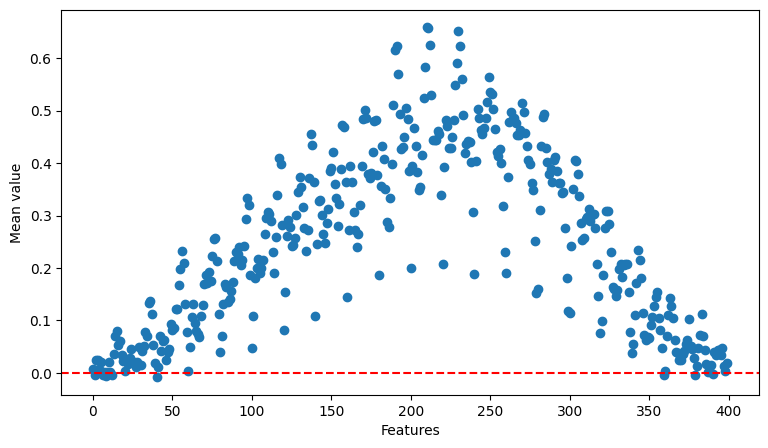

In [ ]:
# Plot features mean values
plt.figure(figsize=(9, 5))
plt.scatter(range(numOfFeatures), np.mean(X, axis=0))
plt.xlabel('Features')
plt.ylabel('Mean value')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

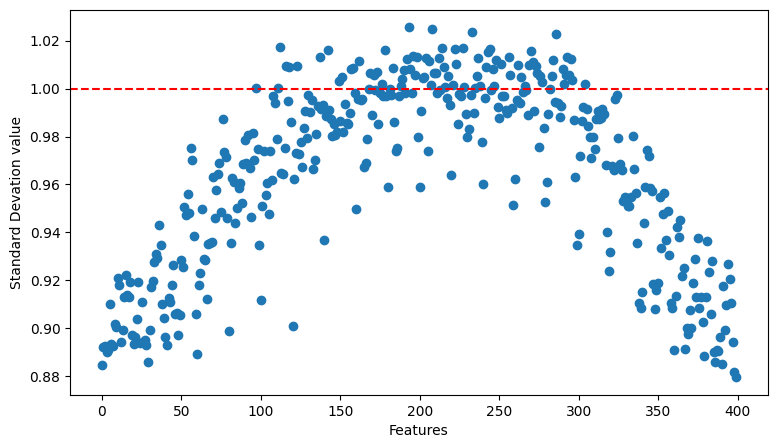

In [ ]:
# Plot features standard devation
plt.figure(figsize=(9, 5))
plt.scatter(range(numOfFeatures), np.std(X, axis=0))
plt.xlabel('Features')
plt.ylabel('Standard Devation value')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

Βλέπουμε πως όλα τα features έχουν μέση τιμή πολύ κοντά στο 0 και std πολύ κοντά στην μονάδα. Οποτε βλέπουμε πως έχουμε να κανούμε και dataset το οποίο φαίνεται να είναι normalized. Αυτό είναι αρκετά σημαντικό καθώς το normalization δίνει ίσα βάρη/importance σε κάθε feature ώστε κανένα από αυτά να μην "γέρνει" την αποδοτικότητα του μοντέλου προς μία κατεύθυνση μόνο και μόνο απλά λόγω μεγάλων νούμερων.

Παρακάτω κάνουμε ένα bar plot για να δούμε τις συχνότητες/κατανομή των labels όλων των samples.

In [ ]:
# This function is used to plot the label frequencies of a dataset
def plot_dataset_labels(X, y):
    fig, ax = plt.subplots(figsize=(9, 5), layout="constrained")

    # Dataset's labels' bar chart
    y_unique, y_unique_counts = np.unique(y, return_counts=True)
    ax.bar(y_unique, y_unique_counts,
              align='center',
              color=['darkslateblue', 'teal', 'yellow', 'coral', 'lawngreen'],
              edgecolor = 'k',
              alpha=0.6)
    ax.set_xlabel('Label')
    ax.set_ylabel('Frequency')
    ax.set_xticks(y_unique)

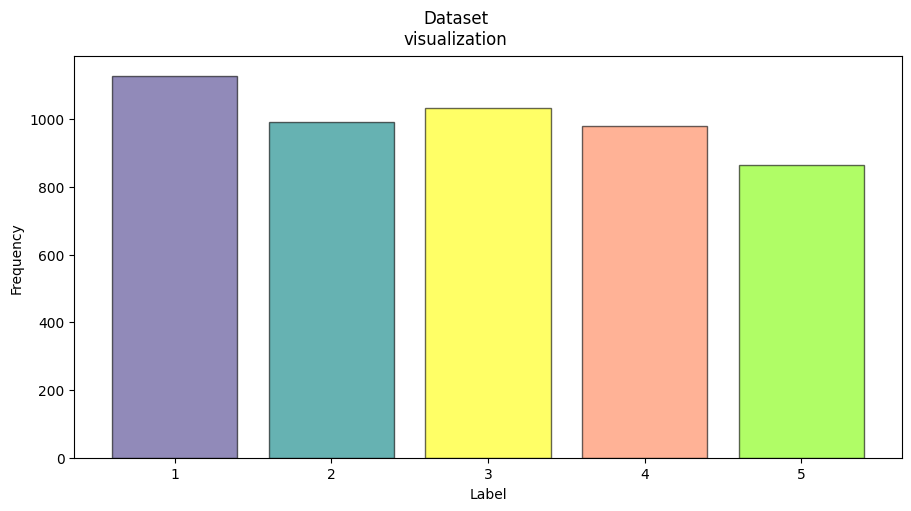

In [ ]:
plot_dataset_labels(X, y)
plt.suptitle('Dataset\nvisualization')
plt.show()

Παρατηρούμε πως το dataset ΔΕΝ είναι ισορροπημένο ως προς όλες τις τιμές των labels.

Κάποιο περαιτέρω visualization του dataset δεν φαίνεται να είναι δυνατό λόγω της υψηλής διαστασιμότητας του.

### Splitting and Preprocess

Για την σωστή αξιολόγηση των μοντέλων (πριν την τελική εξαγωγή των labels από το δεύτερο dataset όπου δεν δίνονται τα labels), απαιτείται να έχουμε ένα data subset το οποιό θα χρησιμοποιούμε μόνο για την χρήση αυτή και δεν θα χρησιμοποιείται κατά την εκπαίδευση των μοντέλων.

Έτσι, χωρίζουμε το dataset σε **training** και **testing** subsets με αναλογία 80% - 20%. Λόγω των πολλών samples, έτσι παίρνουμε επαρκή δείγματα και στα δύο subsets.

Τον διαχωρισμό τον κάνουμε μία φόρα και παρακάτω χρησιμοποιούμε το ίδιο train και test set ώστε να μπορούμε να συγκρίνουμε τα μοντέλα μεταξύ τους.

Ορίζουμε `shuffle=True` στην `train_test_split()` ώστε να γίνει απολύτως τυχαία η επιλογή των δεδομένων ενώ επιλέγουμε και ένα σταθερό `random_state` για χάρη της επαναληψιμότητας εκτέλεσης του κώδικα.   

In [ ]:
split_scale = 0.2   # Split into training and test sets with a 80% - 20% ratio

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_scale,
                                                    shuffle=True,
                                                    random_state=42)

Για να επιβεβαίωσουμε την σωστή λειτουργία της συνάρτησης για τον διαχωρισμό του dataset `train_test_split()` και να σχολιάσουμε το πρόβλημα του class imbalance, κάνουμε το ίδιο visualization που κάναμε παραπάνω και για τα δύο subsets.

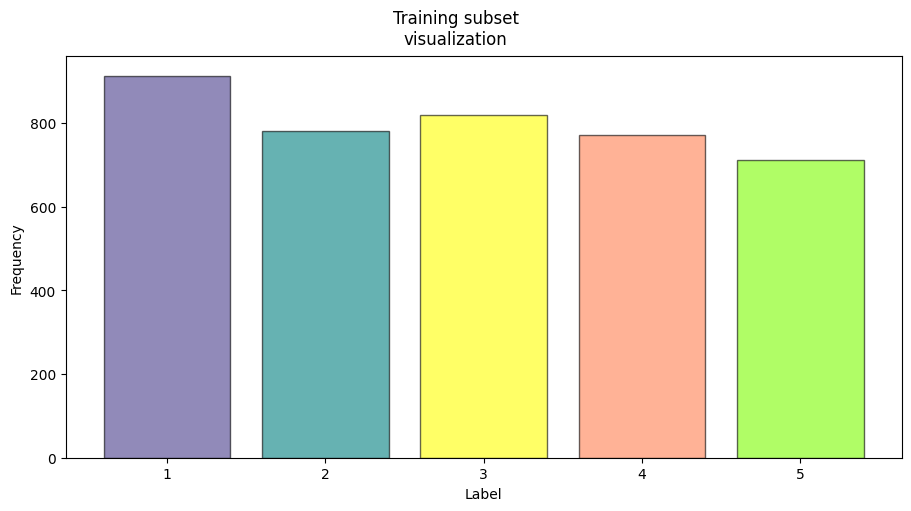

In [ ]:
plot_dataset_labels(X_train, y_train)
plt.suptitle('Training subset\nvisualization')
plt.show()

#### Class Balancing

Θα δούμε τώρα πως θα αντιμετωπίσουμε το class imbalance στο training set.

Αξίζει βέβαια να σημειώσουμε πως δεν βλέπουμε μεγάλο imbalance οπότε μπορεί και να δούμε παρακάτω σε κάποιες περιπτώσεις το balanced set να μην αυξάνει κατά πολύ την απόδοση του classifier (ή και να επιδρά αρνητικά σε κάποιες περιπτώσεις).

Εφόσον έχουμε μεγάλο dataset (5000 samples) και μικρά ποσοστά imbalance επιλέγουμε να κάνουμε undersampling στα δείγματα που έχουν label 1, 2, 3 και 4 ώστε να τα έχουμε ίδιο αριθμό δειγμάτων με αυτά που έχουν label 5 (λόγω μικρών ποσοστών imbalance δεν θα χρείαστει να "σβήσουμε" και πολλά samples οπότε δεν θα μειώσουμε κατά πολύ το μέγεθος του dataset μας).

Επιλέξαμε να μη κάνουμε oversampling γιατί μπορεί να οδηγήσει σε φαινόμενα overfitting που θέλουμε να αποφύγουμε στο κομμάτι της εργασίας αυτό.

Επίσης, λόγω του μεγάλου dataset, μπορούμε να "θυσιάσουμε" μερικά δείγματα.

Τη παραπάνω διαδικασία τη κάνουμε εύκολα με την βοήθεια της συνάρτησης `RandomUnderSampler()` της βιβλιοθήκης **Imbalanced-learn** (`imblearn`). Μάλιστα, επιλέγουμε και πάλι εδω ένα σταθερό `random_state` για χάρη της επαναληψιμότητας εκτέλεσης του κώδικα.


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

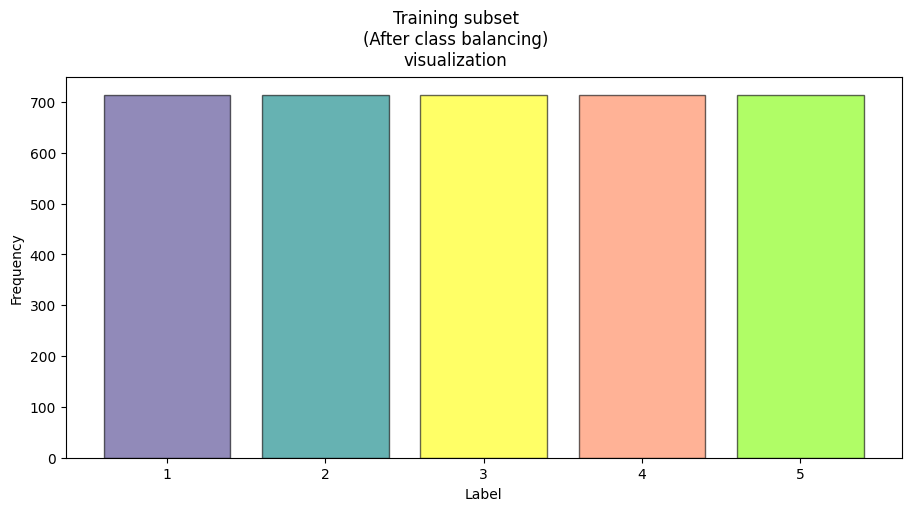

In [ ]:
plot_dataset_labels(X_train_balanced, y_train_balanced)
plt.suptitle('Training subset\n(After class balancing)\nvisualization')
plt.show()

Έτσι, βλέπουμε ότι οι τρείς κλάσεις του training set βρίσκονται όλες πλέον στο ίδιο 'ύψος΄ και έτσι έχουμε πλέον ένα balanced training dataset.

Τέλος, το test set το κρατάμε στην αρχική, class imbalanced κατανομή (όπως φαίνεται και παρακάτω), ώστε να έχουμε μια ρεαλιστική ένδειξη της απόδοσης των παρακάτω μοντέλων μας!

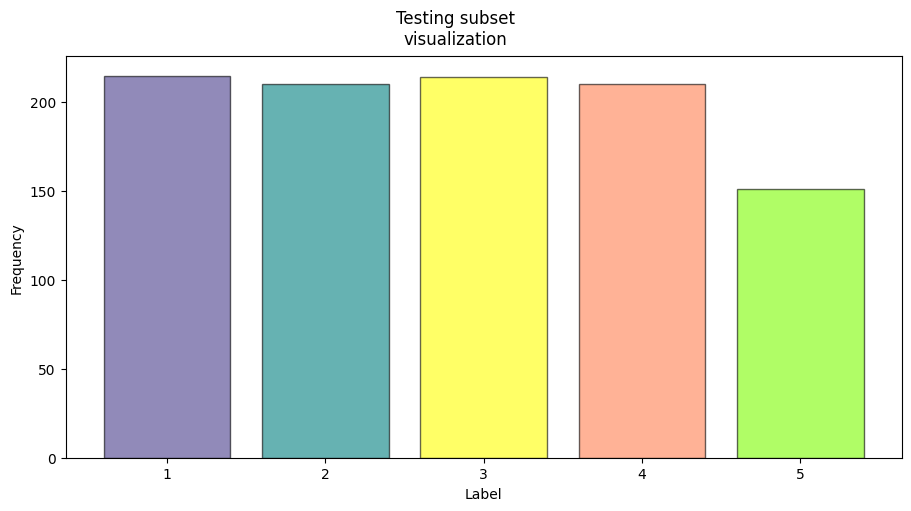

In [ ]:
plot_dataset_labels(X_test, y_test)
plt.suptitle('Testing subset\nvisualization')
plt.show()

#### Dimensionality Reduction

Επειδή, όπως είδαμε και παραπάνω, έχουμε ένα dataset υψήλης διάστασης (400 features). Παρακάτω θα προσπαθήσουμε να δούμε μήπως καταφέρουμε να μείωσουμε τη διάσταση αυτή με κάποια τεχνική μείωση διάστασης και να καταφέρουμε να αυξήσουμε τις αποδόσεις των classifiers μας.

Η μείωση διάστασης μπορεί να βελτίωσει και την ακριβεία των classifiers μας παρακάτω αφαιρώντας τα redundant features (τα οποία και σε πολλές περιπτώσεις μπορούν να οδηγήσουν και σε φαινόμενα overfitting και άρα και σε μειωμένη ικανότητα γενίκευσης). Επιλέγοντας τα πιο "σημαντικά" χαρακτηριστικά, το μοντέλο μπορεί να επικεντρωθεί στις πιο σημαντικές πληροφορίες, οδηγώντας ενδεχομένως και σε βελτιωμένη ακρίβεια.

Το *LASSO* (Last Absolute Shrinkage and Selection Operator) είναι μια τεχνική regularization που χρησιμοποιείται συχνά στη γραμμική παλινδρόμηση προσθέτοντας έναν όρο ποινής στη συνάρτηση κόστους. Αυτός ο όρος ποινής βασίζεται στις απόλυτες τιμές των συντελεστών. Το Lasso μπορεί να χρησιμοποιηθεί αποτελεσματικά για την επιλογή χαρακτηριστικών, επειδή τείνει να συρρικνώνει τους συντελεστές των λιγότερο σημαντικών χαρακτηριστικών προς το μηδέν, αφαιρώντας τους αποτελεσματικά από το μοντέλο.

Θα κάνουμε χρήση cross-validation για να βρούμε, αρχικά, τη βέλτιστη παράμετρο `alpha` (σταθερά που πολλαπλασιάζεται με το `L1` penalty ελέγχοντας το regularization strength)



In [ ]:
# Parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)

print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-05}


Αφού βρήκαμε τη βέλτιστη παράμετρο, ξαναεκπαιδεύουμε ένα Lasso μοντέλο για να δούμε το importance των features του dataset.

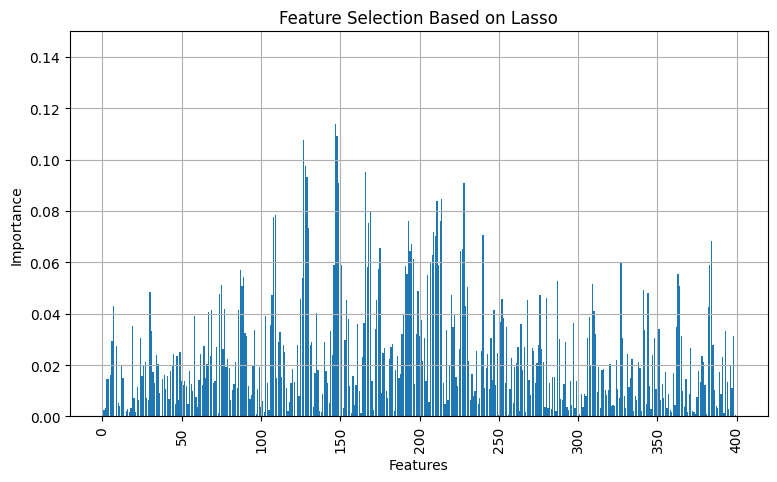

In [ ]:
# Calling the model with the best parameter
bestLasso = Lasso(alpha=0.00001)
bestLasso.fit(X_train, y_train)

# Making coefficients positive
bestLasso_coef = np.abs(bestLasso.coef_)

# Plotting the features and their importance
plt.figure(figsize=(9, 5))
plt.bar(range(numOfFeatures), bestLasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

Θα κρατήσουμε τα features αυτά με συντελεστή διάφορο του μηδενός (με ένα μικρό tolerance = 0.001).

In [ ]:
feature_subset = np.array(range(numOfFeatures))[bestLasso_coef>0.001]

numOfImportantFeatures = np.size(feature_subset)

print("Number of important features:", numOfImportantFeatures)
print("Number of features dropped:", numOfFeatures-numOfImportantFeatures)

Number of important features: 392
Number of features dropped: 8


Παρατηρούμε πως ο αριθμός των σημαντικών παραμέτρων δεν είναι σχεδόν καθόλου μειωμένος σε σχέση με τον αριθμό των παραμέτρων αρχικά (από τα 400 features "βγάλαμε" μόνο 8 εκτός). Αυτό μας δίνει ένα hint στο ότι δεν ίσως να μη μπορούμε να εφαρμόσουμε κάποιο dimensionality reduction στο σύνολο δεδομένων μας.

Παρόλο αυτά, παρακάτω θα τρέξουμε κάποιες δοκιμές με τα μειωμένα αυτά features για να δούμε αν όντως "αξίζει" να κρατήσουμε μόνο τα features αυτά βλέποντας αν αυξάνεται σημαντικά το accuracy των classifiers.

# **Δοκιμές μοντέλων**

Παρακάτω παραθέτουμε όλες τις δοκιμές που κάναμε για να πάρουμε τον κατάλληλο classifier:

Γνωρίζουμε πως σε υψηλής διαστασιμότητας dataset (όπως έχουμε και εδώ), τα δεδομενα μπορούν πιο εύκολα να χωριστούν γραμμικά και έτσι η απλότητα κάποιων classifiers όπως ο Νaive Bayes, linear SVMs και LDA (Linear Discriminant Analysis) μπορούν να οδηγήσουν σε καλύτερο generalization από άλλους classifiers.

## Naive Bayes

Ξεκινάμε με μια δοκιμή με τον Naive Bayes classifier.

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train)

nbScore = nb.score(X_test, y_test)
print(nbScore)

0.804


In [ ]:
nb = GaussianNB()

nb.fit(X_train[:, feature_subset], y_train)

nbScore = nb.score(X_test[:, feature_subset], y_test)
print(nbScore)

0.805


In [ ]:
nb = GaussianNB()

nb.fit(X_train_balanced, y_train_balanced)

nbScore = nb.score(X_test, y_test)
print(nbScore)

0.807


Πράγματι, βλέπουμε πως παίρνουμε αρκετά καλά αποτελέσματα (παρά την απλότητα του classifier). Μάλιστα, επείδη ο Naive Bayes classifier θεωρεί ότι τα features είναι ανεξάρτητα μεταξύ τους, παίρνουμε ένα μικρό hint πως ίσως να ισχυεί και κάτι τέτοιο στο dataset μας.

Επίσης, βλέπουμε πως το dataset με reducted dimensions δεν φαίνεται να αυξάνει κατά πολύ την απόδοση.

## LDA

Παρακάτω κάνουμε δοκιμές με LDA (Linear Discriminant Analysis).

In [ ]:
# Initialize and train model
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train_balanced, y_train_balanced)

model_LDA.score(X_test, y_test)

0.807

In [ ]:
# Initialize and train model
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train_balanced[:, feature_subset], y_train_balanced)

model_LDA.score(X_test[:, feature_subset], y_test)

0.802

Εδώ βλέπουμε παρόμοια αποτελέσματα όποτε παίρνουμε ένα hint πως τα features (ή κάποια από αυτά) του dataset ίσως να είναι γραμμικά εξαρτημένα (ή σχεδόν γραμμικά) με κάποιο τρόπο.

Εδώ μάλιστα βλέπουμε πως το dataset με reducted dimensions μειώνει την απόδοση του classifier. Οπότε, θεωρούμε πως δεν αξίζει να ρισκάρουμε παρακάτω κάτι τέτοιο. Έτσι, από εδώ και πέρα, θα δουλεύουμε με όλα τα features του dataset.

## SVM

Παρακάτω κάνουμε δοκιμές με SVM classifiers δοκιμάζοντας διάφορα kernels.

### Linear Kernel

In [ ]:
# Initialize and train model
model_linearSVM = svm.SVC(kernel='linear', random_state=42)
model_linearSVM.fit(X_train_balanced, y_train_balanced)

model_linearSVM.score(X_test, y_test)

0.769

Βλέπουμε πως για linear kernel function δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί και δεν έχει νόημα να συνεχίσουμε περαιτέρω έρευνα με αυτόν τον classifier.

### RBF Kernel

Παρακάτω τρέχουμε και ένα μικρό πείραμα για τις υπερπαραμέτρους του RBF kernel. Πιο συγκεκριμένα, τρέχουμε ένα grid search για το accuracy και το "εμφανίζουμε" σε ένα heatmap για να δούμε αν υπάρχουν κάποια συγκεκριμένα patterns που μπορούμε να εκμεταλευτούμε.

In [ ]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

score_rbfSVM = []
for C in C_range:
    for gamma in gamma_range:
        # Train model
        model_rbfSVM = svm.SVC(kernel='rbf', random_state=42, C=C, gamma=gamma)
        model_rbfSVM.fit(X_train_balanced, y_train_balanced)

        # Calculate accuracy
        score_rbfSVM.append(model_rbfSVM.score(X_test, y_test))

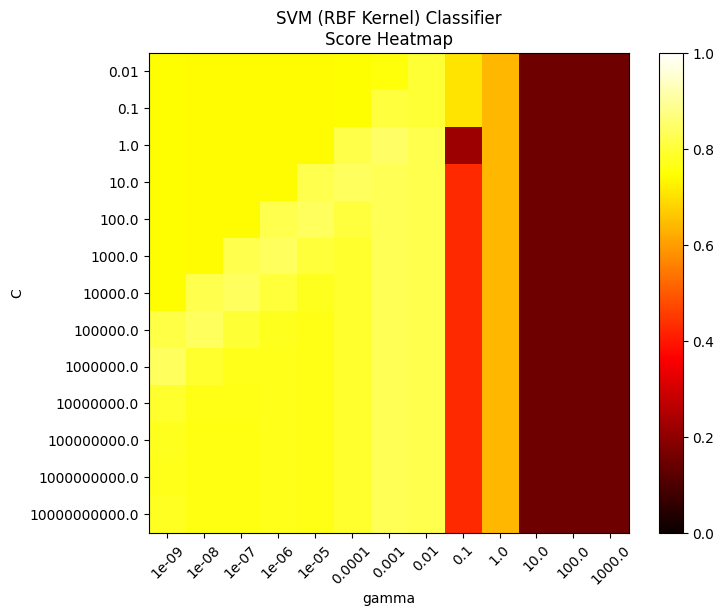

In [ ]:
# Display a heatmap for the score as the hyperparameters change
score_rbfSVM_resh = np.array(score_rbfSVM).reshape(len(C_range), len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(score_rbfSVM_resh,
           interpolation="nearest",
           cmap=plt.cm.hot,
           vmin = 0, vmax=1)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("SVM (RBF Kernel) Classifier\nScore Heatmap")
plt.show()

Βλέπουμε πως για $\gamma \geq$ 10 έχουμε απότομη πτώση της απόδοσης του μοντέλου ενώ για τις υπόλοιπες τιμές παίρνουμε παρόμοιες τιμές.

Επίσης φαίνεται η τιμή του C να μην επηρεάζει κατά πολύ το accuracy (εκτός όταν $\gamma$ = 0.1) .

In [ ]:
np.max(score_rbfSVM)

0.845

Βλέπουμε πως παίρνουμε πολύ καλά αποτελέσματα και έχουμε βγάλει το νέο μας (προς το παρόν) μέγιστο accuracy. Παρόλο αυτά, θεωρούμε πως μπορούμε να βρούμε classifier που να μας δίνει παραπάνω accuracy στο test set μας. Γι' αυτό συνεχίζουμε την αναζήτηση και αν δεν βρούμε κάποιον καλύτερο, θα επιστρέψουμε εδώ για παραπάνω έρευνα.

## k - NN

Παρακάτω κάνουμε με  τον $k$ - NN classifier. Μάλιστα, τρέχουμε και ένα μικρό πείραμα για διάφορες τιμές του $k$.

In [ ]:
# Run training process for every k = 1, 2, ..., 30
k_min = 1
k_max = 30

score_knn = []

for k in range(k_min, k_max + 1):
    # Train model
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_balanced, y_train_balanced)

    # calculate accuracy
    score_knn.append(model_knn.score(X_test, y_test))

In [ ]:
np.max(score_knn)

0.774

Βλέπουμε πως δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί και δεν έχει νόημα να συνεχίσουμε περαιτέρω έρευνα με αυτόν τον classifier.

## Gaussian Process

Παρακάτω κάνουμε δοκιμές με Gaussian Process Clasiffier.

In [ ]:
gp = GaussianProcessClassifier(random_state=42)

gp.fit(X_train_balanced, y_train_balanced)

gp.score(X_test, y_test)

0.151

Βλέπουμε πως δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί ί και δεν έχει νόημα να συνεχίσουμε περαιτέρω έρευνα με αυτόν τον classifier.

## QDA

Παρακάτω κάνουμε δοκιμές με QDA (Quadratic Discriminant Analysis).

In [ ]:
model_QDA = QuadraticDiscriminantAnalysis()

model_QDA.fit(X_train_balanced, y_train_balanced)

model_QDA.score(X_test, y_test)

0.424

Βλέπουμε πως δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί.

## AdaBoost

Παρακάτω κάνουμε δοκιμές με AdaBoost Clasiffier.

In [ ]:
ab = AdaBoostClassifier(random_state=42)

ab.fit(X_train_balanced, y_train_balanced)

ab.score(X_test, y_test)

0.591

Βλέπουμε πως δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί.

## Random Forest

Παρακάτω κάνουμε δοκιμές με Random Forest Clasiffier.

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_balanced, y_train_balanced)

rf.score(X_test, y_test)

0.734

Βλέπουμε πως δεν παίρνουμε ικανοποιητικά αποτελέσματα και δεν καταφέραμε να "κερδίσουμε" το προηγούμενο μας μέγιστο accuracy που είχαμε βρεί.

## Neural Network

Θεωρούμε πως δεν έχει νοήμα να "ψάχνουμε" για άλλους classifiers και θεωρούμε πως θα βγάλουμε το καλύτερο αποτέλεσμα μέσω Deep Learning αλγορίθμων. Θεωρούμε πως η χρήση ενός νευρωνικού δικτύου θα μας παρέχει τα καλύτερα αποτελέσματα για το πρόβλημά μας.

Επειδή ένα νευρωνικό δίκτυο είναι κάτι πολύ γενικό με πολλές παραμέτρους, αποφασίσαμε να περιορίσουμε τον χώρο αναζήτησής μας σε fully connected νευρωνικά δίκτυα. Οι παράμετροι που παίζουν ρόλο στην αρχιτεκτονική μας είναι:

- Ο αριθμός των κρυφών layers [δοκιμάσαμε 2 έως 5]
- Ο αριθμός των νευρώνων σε κάθε ενδιάμεσο κρυφό layer [δοκιμασαμε 128, 400, 500, 1024, 2048]
- Η μη γραμμική συνάρτηση ενεργοποίησης [δοκιμάσαμε $Tanh$, $ReLU$, $LeakyReLU$]

Για την πραγματοποίση αυτών των κυρίων πειραμάτων (αλλά και άλλων για finetuning) χρησιμοποιήθηκε η βοήθεια της υπολογιστικής συστοιχίας "Αριστοτέλης" που παρέχεται από το πανεπιστήμιό μας. Τα πειράματα πραγματοποιήθηκαν στο gpu partition με την βοήθεια του παρακάτω python script και του παρακάτω batch script για την υποβολή εργασίας. Λόγω του υψηλού αριθμού των μεταβλητών παραμέτρων, το script υποβλήθηκε πολλές φορές και κάποιες αλλαγές (αριθμός layers, συνάρτηση ενεργοποίησης και παράμετροι του optimizer) αλλάχθηκαν χειροκίνητα σε κάθε εκτέλεση του cluster job.

Αξίζει να σημειωθεί πως οι εκπαιδεύσεις των ΝΝ έγιναν με το dataset με όλα του τα features (όχι αυτό που προέκυψε μετά από $LASSO$) κάθως αφήσαμε το ίδιο το νευρωνικό να κρίνει την σημαντικότητα του κάθε feature, καθώς του έχουμε δώσει και αρκετά epochs για να το κάνει αυτό.

```python
import pandas as pd
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

import json

# read and prepare dataset
dataset_df = pd.read_csv('datasetC.csv',
                         delimiter=',',
                         skip_blank_lines=True,
                         header=None)
dataset_df = dataset_df.dropna()

dataset = dataset_df.to_numpy()

X = dataset[..., :-1]

y = dataset[..., -1].astype(int)

split_scale = 0.3 # Split into training and test sets with a 70% - 30% analogy.

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_scale,
                                                    shuffle=True)

tensor_X_train = torch.tensor(X_train, dtype=torch.float32)
tensor_y_train = torch.tensor(y_train, dtype=torch.long)
tensor_y_train -= 1

tensor_X_test = torch.tensor(X_test, dtype=torch.float32)
tensor_y_test = torch.tensor(y_test, dtype=torch.long)
tensor_y_test -= 1

myTensorTrainDataset = DataLoader(TensorDataset(tensor_X_train, tensor_y_train), shuffle=True)
myTensorTestDataset = DataLoader(TensorDataset(tensor_X_test, tensor_y_test), shuffle=True)                                                    

print("[*] Dataset loaded successfully")

# Setup device-agnostic code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

print(f"Device to train on: {device}")

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()

    # keep and return training loss
    training_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        training_loss = loss.item()

        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    return training_loss

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return (test_loss, correct)


nn_hidden_units = [ # num of hidden units
    128,
    400,
]

results = {}

epochs = 2000

for hidden_units in nn_hidden_units:
    print(f"[*] Starting experiment for {hidden_units} hidden units\n")
    net = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(400, hidden_units),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(hidden_units, hidden_units),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(hidden_units, hidden_units),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(hidden_units, hidden_units),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(hidden_units, hidden_units),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(hidden_units, 5),
    )  
    net = net.to(device)
    optimizer = optim.SGD(params=net.parameters(), lr=1e-5, momentum=0.9)
    loss_fn = nn.CrossEntropyLoss()

    results_key = f"hu{hidden_units}"

    train_loss = []
    test_loss = []
    test_accuracy = []

    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loss_i = train_loop(myTensorTrainDataset, net, loss_fn, optimizer)
        (test_loss_i, test_accuracy_i) = test_loop(myTensorTestDataset, net, loss_fn)

        train_loss.append(train_loss_i)
        test_loss.append(test_loss_i)
        test_accuracy.append(test_accuracy_i)
    
    results[results_key] = {
        "train_loss": train_loss,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy
    }

with open("results.json", "w") as fp:
    json.dump(results, fp)
```

```bash
#!/bin/bash
#SBATCH --job-name=PatternRecognitionGodMode
#SBATCH --partition=gpu
#SBATCH --gres=gpu:1
#SBATCH --ntasks=1
#SBATCH --time=12:00:00

source ~/pytorch-2.1.0/bin/activate
python3 search_nn.py
```

Οι βέλτιστες παράμετροι που βρέθηκαν είναι:

- 4 hidden layers
- 400 hidden units σε κάθε layer
- $LeakyReLU$ activation function με αρνητική κλίση 0.1

Επιπρόσθετα, χρησιμοποιήθηκαν Dropout layers με $p = 0.4$, και δοκιμάστηκαν πολλαπλές τιμές learning rate (`1e-3`, `1e-4`, `1e-5`) και momentum (0, 0.9).

Παρακάτω, παραθέτουμε την τελική μορφή του δικτύου, την προετοιμασία των συνόλων εκπαίδευσης και αξιολόγησης για να χρησιμοποιηθούν από αυτό, καθώς και βοηθητικές συναρτήσης για την εκπαίδευση και την αξιολόγησή του.

In [ ]:
# Setup device-agnostic code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

In [ ]:
# Network architecture
net = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(400, 400),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(400, 400),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(400, 400),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(400, 400),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(400, 400),
        nn.LeakyReLU(0.1),

        nn.Dropout(0.4),
        nn.Linear(400, 5),
    )
net = net.to(device)

Παρατηρήσαμε κατά τις δοκιμές μας ότι το να κάνουμε batching στα σύνολα εκπαίδευσης και δοκιμής (και κατ επέκταση batch normalization μεταγενέστερα στο δίκτυο) δεν μας προσέφερε κάποια βελτίωση. Έτσι, αφήσαμε το batch size στην default τιμή του (1).

In [ ]:
# Dataset preparation
tensor_X_train = torch.tensor(X_train, dtype=torch.float32)
tensor_y_train = torch.tensor(y_train, dtype=torch.long)
tensor_y_train -= 1

tensor_X_test = torch.tensor(X_test, dtype=torch.float32)
tensor_y_test = torch.tensor(y_test, dtype=torch.long)
tensor_y_test -= 1

myTensorTrainDataset = DataLoader(TensorDataset(tensor_X_train, tensor_y_train), shuffle=True)
myTensorTestDataset = DataLoader(TensorDataset(tensor_X_test, tensor_y_test), shuffle=True)

In [ ]:
# Train and test loop functions
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()

    # keep and return training loss
    training_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        training_loss = loss.item()

    return training_loss

In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    return (test_loss, correct)

Παρατηρήσαμε ότι επιτυγχάνεται καλύτερη σύγκλιση του μοντέλου μας και αποφεύγονται ταλαντώσεις στο loss για χαμηλές τιμές learning rate και για μη μηδενική τιμή momentum. Έτσι, για το τελικό μας μοντέλο, κρατήσαμε τις τιμές 1e-5 και 0.9 για το learning rate και το momentum αντίστοιχα.

In [ ]:
# Loss and optimizer initialization
optimizer = optim.SGD(params=net.parameters(), lr=1e-5, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

Τέλος, εκπαιδεύουμε το δίκτυο για τον βέλτιστο αριθμό epochs (800), όπως φάνηκε από το output που είχαμε πάρει από τα πειράματα (κάπου εκεί φαινόταν να έχουμε συγκλίση και να μην μειώνεται άλλο το loss)

In [ ]:
epochs = 800
train_loss = np.zeros((epochs, 1))
test_loss = np.zeros((epochs, 1))
test_accuracy = np.zeros((epochs, 1))

for i in range(epochs):
    print(f"[*] Epoch {i+1}")
    train_loss_i = train_loop(myTensorTrainDataset, net, loss_fn, optimizer)
    (test_loss_i, test_accuracy_i) = test_loop(myTensorTestDataset, net, loss_fn)
    train_loss[i] = train_loss_i
    test_loss[i] = test_loss_i
    test_accuracy[i] = test_accuracy_i

[*] Epoch 1
[*] Epoch 2
[*] Epoch 3
[*] Epoch 4
[*] Epoch 5
[*] Epoch 6
[*] Epoch 7
[*] Epoch 8
[*] Epoch 9
[*] Epoch 10
[*] Epoch 11
[*] Epoch 12
[*] Epoch 13
[*] Epoch 14
[*] Epoch 15
[*] Epoch 16
[*] Epoch 17
[*] Epoch 18
[*] Epoch 19
[*] Epoch 20
[*] Epoch 21
[*] Epoch 22
[*] Epoch 23
[*] Epoch 24
[*] Epoch 25
[*] Epoch 26
[*] Epoch 27
[*] Epoch 28
[*] Epoch 29
[*] Epoch 30
[*] Epoch 31
[*] Epoch 32
[*] Epoch 33
[*] Epoch 34
[*] Epoch 35
[*] Epoch 36
[*] Epoch 37
[*] Epoch 38
[*] Epoch 39
[*] Epoch 40
[*] Epoch 41
[*] Epoch 42
[*] Epoch 43
[*] Epoch 44
[*] Epoch 45
[*] Epoch 46
[*] Epoch 47
[*] Epoch 48
[*] Epoch 49
[*] Epoch 50
[*] Epoch 51
[*] Epoch 52
[*] Epoch 53
[*] Epoch 54
[*] Epoch 55
[*] Epoch 56
[*] Epoch 57
[*] Epoch 58
[*] Epoch 59
[*] Epoch 60
[*] Epoch 61
[*] Epoch 62
[*] Epoch 63
[*] Epoch 64
[*] Epoch 65
[*] Epoch 66
[*] Epoch 67
[*] Epoch 68
[*] Epoch 69
[*] Epoch 70
[*] Epoch 71
[*] Epoch 72
[*] Epoch 73
[*] Epoch 74
[*] Epoch 75
[*] Epoch 76
[*] Epoch 77
[*] Epoc

### Training plot and metrics

Παρουσιάζουμε τα διαγράμματα εκπαίδευσης του δικτύου.

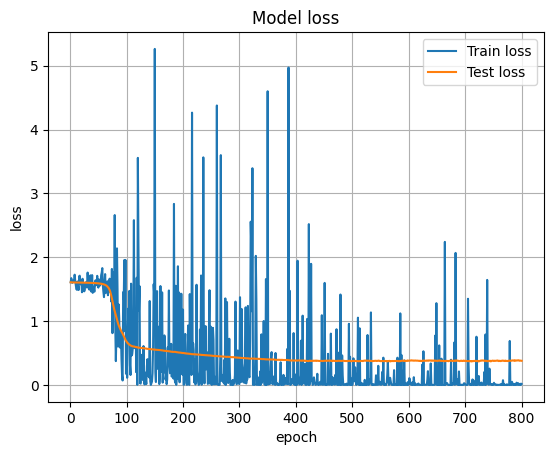

In [ ]:
# Plot the model's train and test loss to see if it overfits
plt.figure()
plt.plot(range(1, epochs + 1), train_loss, range(1, epochs + 1), test_loss)
plt.legend(["Train loss", "Test loss"])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.show()

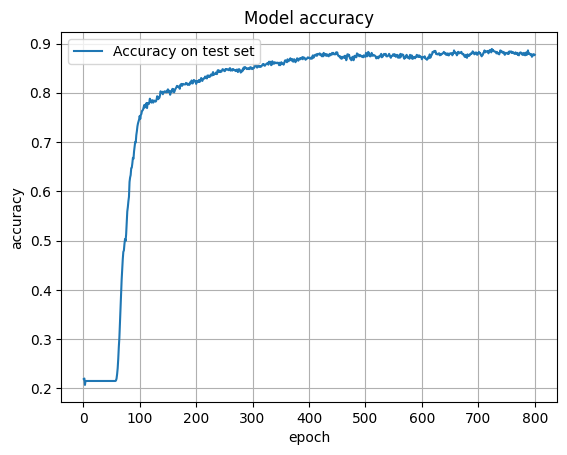

In [ ]:
# Plot the model's accuracy with epochs
plt.figure()
plt.plot(range(1, epochs + 1), test_accuracy)
plt.legend(["Accuracy on test set"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()

Παρατηρούμε ότι φαίνεται να έχουμε σύγκλιση ενώ δεν εμφανίζονται περιπτώσεις overfitting, καθώς το test loss φαίνεται να μειώνεται μαζί με το train loss με το πέρασμα των epochs.

Επίσης βλέπουμε να έχουμε και σύγκλιση.

In [ ]:
print(max(test_accuracy))
print(test_accuracy[-1])

[0.889]
[0.877]


Παρατηρούμε ότι λαμβάνουμε πολύ ικανοποιητικά αποτελέσματα για την ακρίβεια του μοντέλου, η οποία φτάνει μέχρι και το 89% περίπου, ενώ το μοντέλο που έχουμε κατέληξε με ακρίβεια περίπου 88%. Χρησιμοποιώντας τεχνικές όπως early stopping, ή με την χρήση ακόμα πιο μικρού learning rate και περισσότερων εποχών εκπαίδευσης, θα μπορούσαμε ενδεχομένως να πλησιάσουμε και το 90%.

# **Εφαρμογή του τελικού μοντέλου στο test set**

Ως τελικό μοντέλο χρησιμοποιούμε αυτό του νευρωνικού δικτύου που καταλήξαμε ακριβώς παραπάνω.

## Test dataset import and preprocess

Παρακάτω φορτώνουμε το dataset `datasetCTest.csv` που δόθηκε για την αξιολόγηση μας, στο οποίο δεν δίνονται τα labels.

In [ ]:
dataset_df_finalTest = pd.read_csv('/content/pattern_recognition_assignment/datasetCTest.csv',
                                   delimiter=',',
                                   skip_blank_lines=True,
                                   header=None)

# Drop any samples that have nan values
dataset_df_finalTest = dataset_df_finalTest.dropna()

display(dataset_df_finalTest)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-2.47790,0.68857,0.287380,-0.17280,-1.34050,-0.991000,0.059067,1.106200,0.659300,-0.39487,...,1.485900,0.42348,1.39440,-0.92174,-0.860860,-0.695610,1.016700,0.090674,-1.27330,0.402280
1,-0.20541,0.17982,-1.793900,1.45690,0.25691,-0.239450,0.219400,0.363210,-1.209400,0.53497,...,-2.127000,0.21143,-1.12520,0.50403,0.540360,0.024167,1.093300,1.703100,-0.50955,-0.671590
2,-0.99794,-0.38505,-2.395000,-0.51227,0.16132,0.895100,1.307500,-0.656420,0.928020,-0.91786,...,0.151720,-0.51448,0.11457,-0.61969,-1.478800,-0.035980,0.550380,-0.028087,1.29920,-0.314200
3,1.53080,0.88543,-0.498820,-1.07910,0.13616,0.086067,0.030846,0.211630,0.235680,-1.33610,...,-0.860320,-0.03442,-0.99080,-0.52351,1.117500,0.005782,-0.729210,-1.159300,-0.18932,-1.245500
4,0.54730,-0.39412,-0.529920,-0.04556,-1.39110,0.442700,-0.044157,-2.103300,-0.178400,0.30902,...,-1.189700,0.25043,0.72088,0.37806,0.045692,1.370800,-0.350280,-0.513360,-0.50439,0.104650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.08910,0.21326,0.835030,-0.28417,0.27307,-0.056314,-1.010900,0.043052,-0.725640,1.28370,...,0.014324,0.25837,-0.48153,0.66335,0.175260,-0.154830,0.050111,0.714430,0.23764,1.347100
996,-0.59062,0.26715,0.347110,-1.33250,0.56694,-0.805930,-1.934900,-0.154540,1.513700,-0.60100,...,-1.004700,-0.66115,-0.36408,0.24614,1.389900,-0.117560,-0.121790,1.787100,-0.21640,-0.788620
997,0.28128,0.88843,-0.040095,-0.24175,-0.52194,-0.405620,1.135000,0.334720,-0.078696,1.71100,...,-0.103000,-0.12294,1.23640,-1.05740,0.361620,-1.782500,0.589480,0.429690,-1.08450,-0.792160
998,0.63851,-0.37042,-0.847930,-0.67745,0.20323,1.400100,0.396640,-0.687600,1.386500,1.37040,...,1.134600,-0.75447,-0.90325,0.95127,0.462900,-0.503690,-0.668310,0.120380,-1.28320,-0.430640


In [ ]:
X_finalTest = dataset_df_finalTest.to_numpy()

if np.size(X_finalTest, 1) == numOfFeatures:
    print('Number of features (columns) of test set is OK!')

Number of features (columns) of test set is OK!


## Εκτέλεση πρόβλεψης τελικού μοντέλου Neural Network

Παρακάτω παίρνουμε τα ζητούμενα labels του `datasetCTest.csv` με το τελικό εκπαιδευμένο μοντέλο:

In [ ]:
# Wrap evaluation input into a tensor
tensor_X_eval = torch.tensor(X_finalTest, dtype=torch.float32)

# Send to device
tensor_X_eval = tensor_X_eval.to(device)

# Make prediction
pred_eval = net(tensor_X_eval)

# Get prediction from logits (raw propabilities)
labels42 = pred_eval.argmax(1)

# Turn into numpy array
labels42 = labels42.detach().cpu().numpy()
labels42 = labels42 + 1 # Add +1 to convert from 0-4 prediction results to 1-5

## Αποθήκευση των labels σε .npy αρχείο

In [ ]:
# Making sure that all labels are saved as integers
labels42 = labels42.astype(int)

In [ ]:
np.shape(labels42)

(1000,)

In [ ]:
print(labels42)

[5 2 4 1 4 1 2 4 3 4 3 5 1 2 1 5 5 3 5 1 4 5 5 1 1 2 1 3 2 2 2 2 2 1 2 2 3
 5 3 3 1 3 2 4 4 2 1 5 2 4 3 2 1 2 1 3 2 1 2 4 1 1 3 2 1 3 3 1 3 4 1 4 3 1
 1 2 4 3 5 1 1 5 4 4 1 5 5 4 5 2 4 2 3 3 2 4 3 2 4 3 4 1 1 4 5 5 2 4 3 2 3
 5 1 4 5 3 1 5 3 4 2 1 1 1 4 5 3 2 5 2 1 5 5 1 4 1 2 1 4 2 4 4 2 4 1 5 2 1
 4 2 3 1 2 3 3 3 4 5 4 1 1 1 2 3 4 4 5 2 3 1 1 1 2 2 3 5 4 5 1 1 5 5 3 3 4
 3 4 5 1 3 5 3 2 1 3 2 1 2 5 1 3 1 2 1 3 3 3 2 3 5 4 5 2 4 5 1 1 5 3 3 1 1
 4 4 4 2 5 4 4 1 3 2 1 2 3 4 4 3 3 4 2 5 1 2 4 5 1 5 3 3 1 1 3 4 4 2 3 2 2
 5 1 5 1 5 1 5 4 2 1 1 4 4 1 1 5 2 1 3 4 4 2 5 1 1 2 2 3 5 4 5 4 5 1 1 2 3
 3 4 3 5 4 1 1 4 2 4 1 4 1 2 1 4 4 3 4 4 4 4 4 4 5 3 5 5 3 2 1 5 1 5 3 1 3
 1 4 2 1 1 3 3 3 4 2 5 1 1 2 2 4 1 4 4 3 2 5 5 4 5 1 1 2 1 2 4 3 5 3 2 4 2
 5 1 5 3 3 5 5 4 3 4 3 3 5 3 2 4 5 3 2 5 4 2 5 1 2 3 4 5 3 5 2 1 5 2 3 4 5
 4 5 5 1 1 2 3 3 4 3 5 4 1 1 1 4 2 3 4 2 4 4 1 3 1 4 4 5 3 3 5 1 3 3 4 1 1
 3 4 5 1 5 3 1 2 4 3 3 5 5 1 4 4 1 4 2 3 1 4 1 4 2 1 4 5 2 4 5 2 1 2 4 3 5
 2 5 2 4 5 2 4 3 4 1 2 2 

In [ ]:
np.save('/content/pattern_recognition_assignment/labels42.npy', labels42)

Παρακατώ, όπως ζητήθηκε, θα βεβαιωθούμε ότι το αποθηκευμένο `labels42.npy` μπορεί να διαβαστεί με την
`numpy.load()` και ότι έχει διάσταση N (N ο αριθμός των samples στο test set).

In [ ]:
# We load the labels from the file again to check
y_finalTest_loaded = np.load('/content/pattern_recognition_assignment/labels42.npy')

print(y_finalTest_loaded)

[5 2 4 1 4 1 2 4 3 4 3 5 1 2 1 5 5 3 5 1 4 5 5 1 1 2 1 3 2 2 2 2 2 1 2 2 3
 5 3 3 1 3 2 4 4 2 1 5 2 4 3 2 1 2 1 3 2 1 2 4 1 1 3 2 1 3 3 1 3 4 1 4 3 1
 1 2 4 3 5 1 1 5 4 4 1 5 5 4 5 2 4 2 3 3 2 4 3 2 4 3 4 1 1 4 5 5 2 4 3 2 3
 5 1 4 5 3 1 5 3 4 2 1 1 1 4 5 3 2 5 2 1 5 5 1 4 1 2 1 4 2 4 4 2 4 1 5 2 1
 4 2 3 1 2 3 3 3 4 5 4 1 1 1 2 3 4 4 5 2 3 1 1 1 2 2 3 5 4 5 1 1 5 5 3 3 4
 3 4 5 1 3 5 3 2 1 3 2 1 2 5 1 3 1 2 1 3 3 3 2 3 5 4 5 2 4 5 1 1 5 3 3 1 1
 4 4 4 2 5 4 4 1 3 2 1 2 3 4 4 3 3 4 2 5 1 2 4 5 1 5 3 3 1 1 3 4 4 2 3 2 2
 5 1 5 1 5 1 5 4 2 1 1 4 4 1 1 5 2 1 3 4 4 2 5 1 1 2 2 3 5 4 5 4 5 1 1 2 3
 3 4 3 5 4 1 1 4 2 4 1 4 1 2 1 4 4 3 4 4 4 4 4 4 5 3 5 5 3 2 1 5 1 5 3 1 3
 1 4 2 1 1 3 3 3 4 2 5 1 1 2 2 4 1 4 4 3 2 5 5 4 5 1 1 2 1 2 4 3 5 3 2 4 2
 5 1 5 3 3 5 5 4 3 4 3 3 5 3 2 4 5 3 2 5 4 2 5 1 2 3 4 5 3 5 2 1 5 2 3 4 5
 4 5 5 1 1 2 3 3 4 3 5 4 1 1 1 4 2 3 4 2 4 4 1 3 1 4 4 5 3 3 5 1 3 3 4 1 1
 3 4 5 1 5 3 1 2 4 3 3 5 5 1 4 4 1 4 2 3 1 4 1 4 2 1 4 5 2 4 5 2 1 2 4 3 5
 2 5 2 4 5 2 4 3 4 1 2 2 

In [ ]:
np.shape(y_finalTest_loaded)

(1000,)

In [ ]:
N = np.size(X_finalTest, 0)

# Check if the saved file has an array with length N
if N == np.size(y_finalTest_loaded, 0):
    print('labels42.npy size is OK! ( Vector with size N =', N, ')')

# Check if the array loaded is the same as the one we tried to save
if np.array_equal(y_finalTest_loaded, labels42):
    print('Loading labels42.npy is OK!')

labels42.npy size is OK! ( Vector with size N = 1000 )
Loading labels42.npy is OK!
